## 과제에 대한 힌트

* Embarked가 S면 죽을 확률이 높음. 그러므로 Pclass가 3이고 Embarked가 S면 생존률 매우 적음
* Parch와 SibSp를 합쳐서 family size로 볼 수 있는데 family size가 크면 가족을 챙기느라 탈출 시간이 늦어져서 죽을 확률이 높음
* 가족이 있는 사람이 죽으면 그 가족도 같이 죽을 확률이 큼
* 죽은 사람과 같은 성을 쓰고 family size가 같은 사람은 그 죽은 사람의 가족이므로 같이 죽었을 확률이 큼

## Python의 가장 큰 특징은 범용성

* 패키지를 가져오는 방식으로 확장판을 사용할 수 있음
* 웹개발을 하고 싶으면 flask 혹은 장고
* 데이터를 다루고 싶으면 sql을 쓸 수 있음

## 주피터 노트북은 외부에서 접속하는 것이 아니므로 와이파이가 꺼져 있어도 실행 가능하다

In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('data/test.csv')

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Explore(데이터 분석 시작, 탐험한다라는 뜻으로!)

In [6]:
import seaborn as sns

## Embarked, 어디서 몇명탔는지를 파악

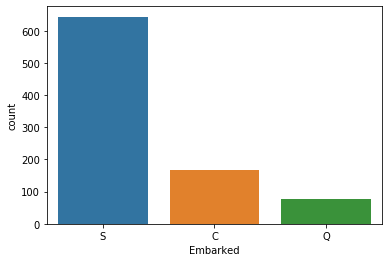

In [7]:
sns.countplot(data = train, x = 'Embarked')

## 사실 몇명탔는지는 중요하지 않고 살았냐 죽었냐가 중요

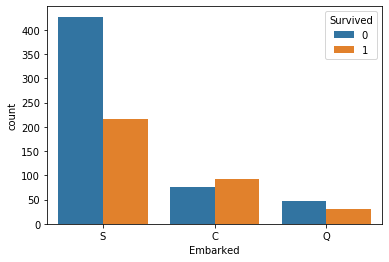

In [8]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

## S에선 많이 타지만 많이 죽고, C에선 적게 타고 많이 삼

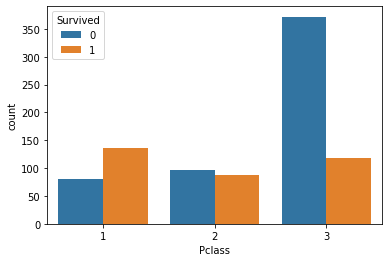

In [9]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

## 3등급에선 산 사람보다 죽은 사람이 훨씬 많음, 2등급은 비슷, 1등급은 많이 삼

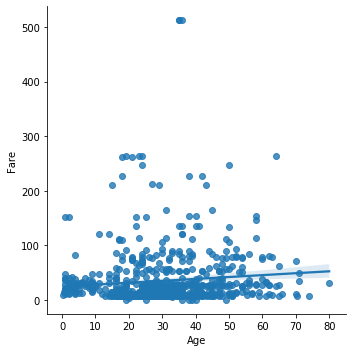

In [10]:
sns.lmplot(data = train, x = 'Age', y = 'Fare')

## 나이와 요금으로 점을 찍음. 밑에 보이는 선은 회귀선 혹은 추세선이라고 함. 잘 쓰이진 않음(얻을 수 있는 정보가 적고, 추세선을 얻는 데 시간이 많이 걸림)

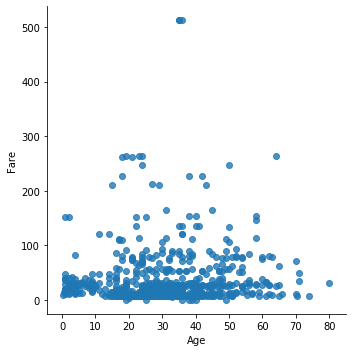

In [11]:
sns.lmplot(data = train, x = 'Age', y = 'Fare', fit_reg = False)

## fit_reg를 넣으면 추세선 사라짐

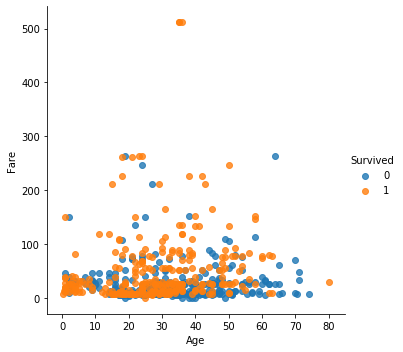

In [12]:
sns.lmplot(data = train, x = 'Age', y = 'Fare',  hue = 'Survived', fit_reg = False)

## 특정 위치에 오렌지색이 많이 몰려있으면 사람이 많이 사는구나, 파란색이 많이 몰려있으면 많이 죽는구나를 알 수 있음

## 위의 그래프에서 특정 부분에 많이 몰려있다라고는 볼 수 없음 평균 요금이 $\$36$인데 $500 이상을 준 사람들이 있음. 전반적인 분포와 동떨어져 있는 것을 Outlier라고 함. 시각화의 장점은 Outlier들을 직관적으로 바로 파악할 수 있음

In [13]:
# 운임요금 $500 이상 파악

high_fare = train[train['Fare'] > 500]

In [14]:
# 운임요금 $500 이하 파악

low_fare = train[train['Fare'] < 500]

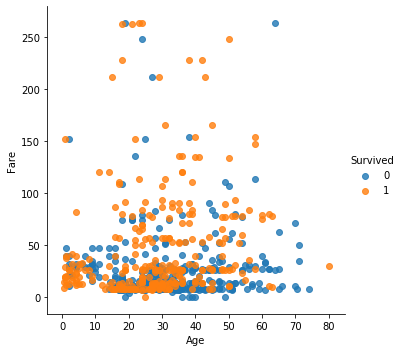

In [15]:
sns.lmplot(data = low_fare, x = 'Age', y = 'Fare',  hue = 'Survived', fit_reg = False)

## low_fare 부분만 살펴보면 $\$200$ 이상에선 4명만 죽고 다 살았음

 ## 데이터 사이언티스트가 쓰는 인공지능은 90% 이상이 머신러닝 그러므로 머신러닝 == 인공지능 이라고 생각해도됌

# 이번에 쓸 머신러닝 알고리즘은 Decision Tree

## 네모상자는 If문. True냐 False냐에 따라 나눠 갈라짐. Desicion tree의 작동방식과 매우 유사

## 데이터를 가져와서 Decision Tree에 넣으면 얘가 알아서 다 함

## 두가지 특성 Feature와 Label을 가지고 있으면 Decision Tree를 쓸 수 있음

## Train

In [16]:
# Feature(x) - Pclass, Sex, Fare, ...
# Label(y0) - Survived

# feature를 한꺼번에 쓰면 어떻게 작용하지는 지 모르므로 하나씩 적용하면서 Decision Tree를 배움

In [17]:
feature_names = ["Pclass"]
feature_names

['Pclass']

In [18]:
X = train[feature_names]
X.head()

,Pclass
0,3
1,1
2,3
3,1
4,3


In [19]:
label_name = 'Survived'

y = train[label_name]

y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Use Decision Tree

In [20]:
# scikit-learn == sklearn

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
# 1) fit(train) -> 2) predict(test)


# fit: 알고리즘을 학습한다
# 학습: 데이터간의 패턴, 상관관계를 스스로 찾는 것이 학습한다 라고 한다.

In [22]:
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Visualize 학습 과정을 시각화

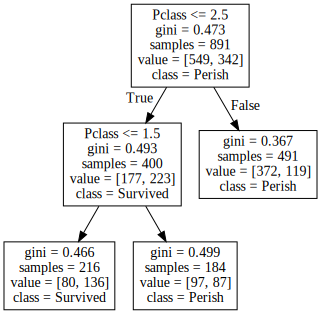

In [23]:
import graphviz
from sklearn.tree import export_graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:\\Users\\user\\Anaconda3\\Library\\bin\\graphviz'

tree = export_graphviz(model,
                       feature_names = feature_names,
                       class_names = ["Perish", "Survived"])

graphviz.Source(tree)

## 위의 예측 결과를 보면 Pclass <= 1.5는 살고 나머진 죽는다 라고 예측

## Predict

In [24]:
X_test = test[feature_names]

X_test.head()

,Pclass
0,3
1,3
2,2
3,3
4,3


In [25]:
prediction_list = model.predict(X_test)
prediction_list[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

## Submit

In [26]:
# 제출 샘플
submit = pd.read_csv('data/gender_submission.csv')
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [27]:
# 우리의 예측결과를 집어넣음
submit['Survived'] = prediction_list

submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [28]:
# 저장 한 뒤 케글에 제출, 단 앞에 index는 없애고 제출해야함 
submit.to_csv('Decision-tree.csv', index = False)

 ## 성별은 숫자가 아니라 문자 male, female로 되어있기 때문에
 ## 이를 고쳐주는 작업이 필요함

## Preprocessing

### Encode Sex

In [29]:
train['Sex_encode'] = train['Sex'].replace('male', 0).replace('female', 1)

train[['Sex', 'Sex_encode']].head()

,Sex,Sex_encode
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [30]:
feature_names = ['Pclass', 'Sex_encode']
feature_names

['Pclass', 'Sex_encode']

In [31]:
X = train[feature_names]
X.head()

,Pclass,Sex_encode
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [32]:
label_name = "Survived"
y = train[label_name]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
# scikit-learn == sklearn

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

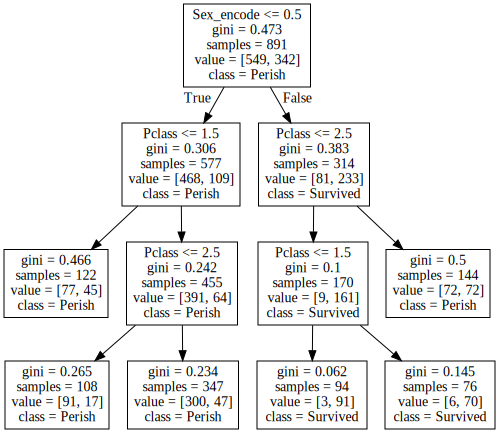

In [35]:
import graphviz
from sklearn.tree import export_graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:\\Users\\user\\Anaconda3\\Library\\bin\\graphviz'

tree = export_graphviz(model,
                       feature_names = feature_names,
                       class_names = ["Perish", "Survived"])

graphviz.Source(tree)

In [36]:
test['Sex_encode'] = test['Sex'].replace('male', 0).replace('female', 1)

test[['Sex', 'Sex_encode']].head()

,Sex,Sex_encode
0,male,0
1,female,1
2,male,0
3,male,0
4,female,1


In [37]:
X_test = test[feature_names]
X_test.head()

,Pclass,Sex_encode
0,3,0
1,3,1
2,2,0
3,3,0
4,3,1


In [38]:
prediction_list = model.predict(X_test)
prediction_list[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [39]:
# 제출 샘플
submit = pd.read_csv('data/gender_submission.csv')
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [40]:
# 우리의 예측결과를 집어넣음
submit['Survived'] = prediction_list

submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
submit.to_csv('decision-tree.csv', index = False)

## 이번엔 운임요금까지 포함해서

## 먼저 비어있는 값부터 처리

## Fill in missing Fare

In [42]:
# NaN(Not a Number), null
train["Age"].isnull() # 비어있으면 True 안비어있으면 False

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [43]:
# train 데이터로 감싸주면 Age 컬럼이 비어있는 곳만 나옴

train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0


In [44]:
# Test 데이터셋에서 비어있는 값이 하나 있음
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [45]:
# 비어있는 값에 0을 집어넣ㅇ므
test['Fare'] = test['Fare'].fillna(0)
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode


In [46]:
feature_names = ['Pclass', 'Sex_encode', 'Fare']
feature_names

['Pclass', 'Sex_encode', 'Fare']

In [47]:
X = train[feature_names]
X.head()

,Pclass,Sex_encode,Fare
0,3,0,7.2500
1,1,1,71.2833
2,3,1,7.9250
3,1,1,53.1000
4,3,0,8.0500


In [48]:
label_name = 'Survived'

y = train[label_name]

y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [49]:
# scikit-learn == sklearn

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

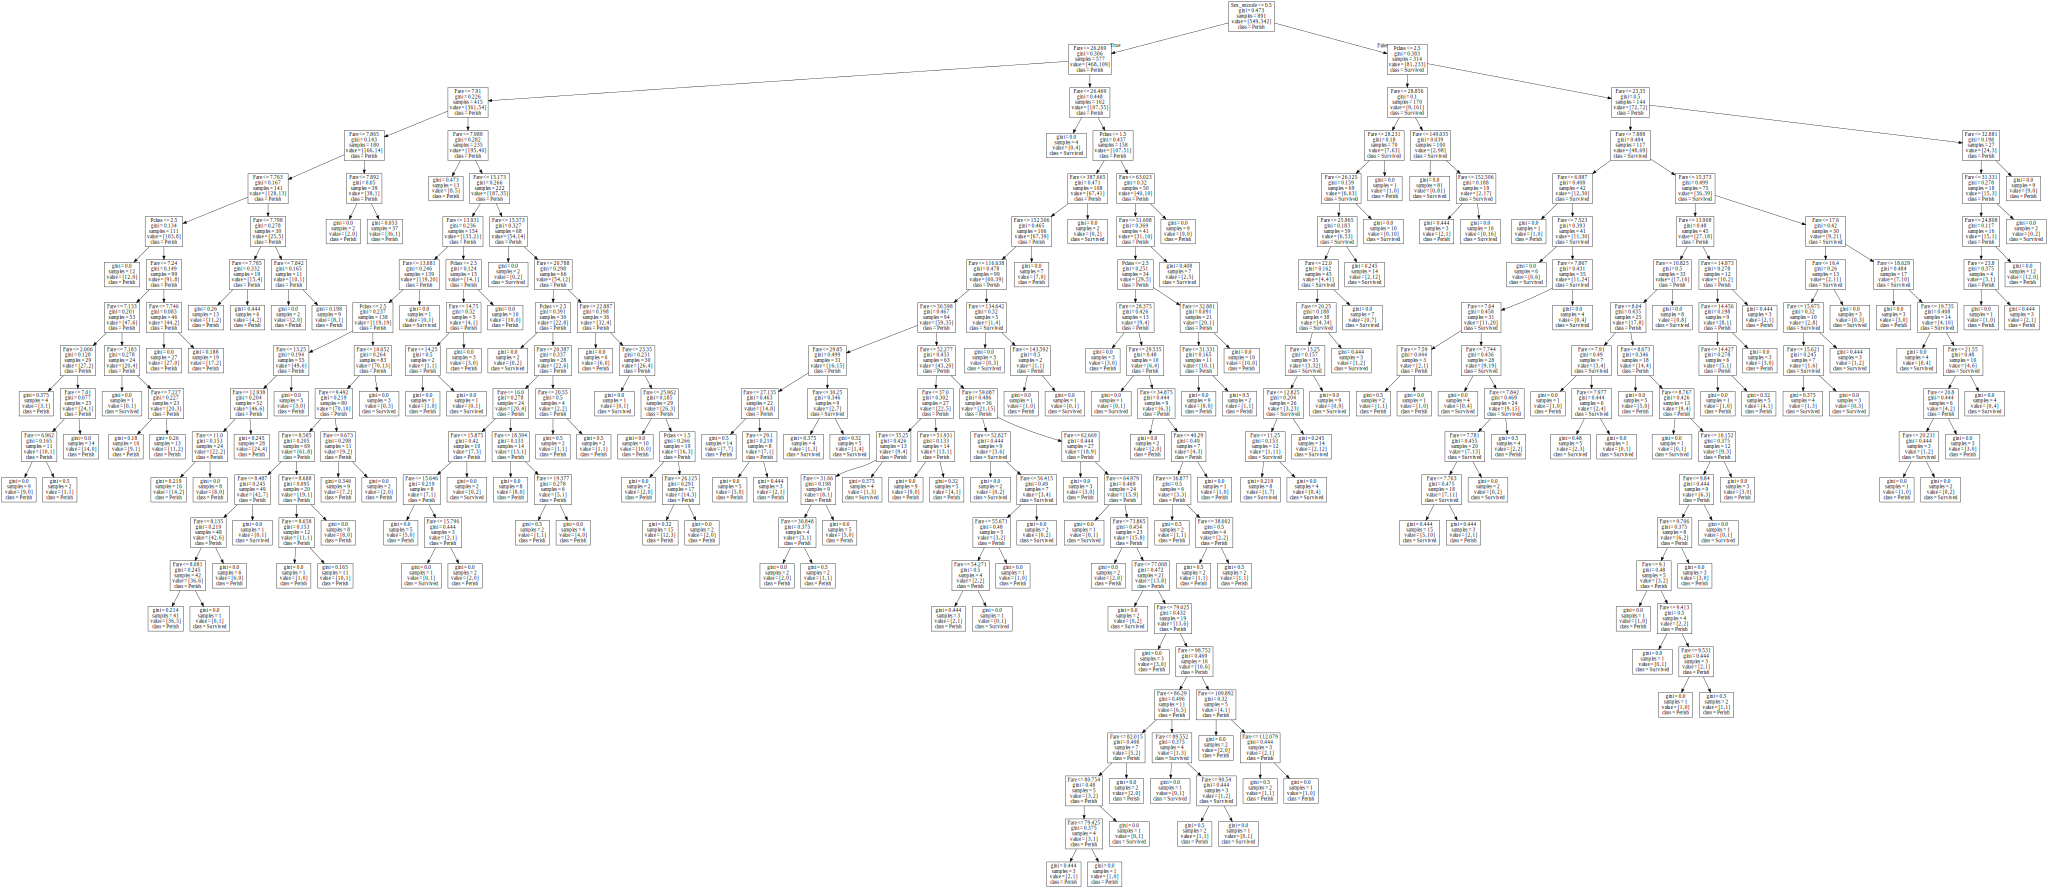

In [51]:
import graphviz
from sklearn.tree import export_graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:\\Users\\user\\Anaconda3\\Library\\bin\\graphviz'

tree = export_graphviz(model,
                       feature_names = feature_names,
                       class_names = ["Perish", "Survived"])

graphviz.Source(tree)

In [52]:
test['Sex_encode'] = test['Sex'].replace('male', 0).replace('female', 1)

test[['Sex', 'Sex_encode']].head()

,Sex,Sex_encode
0,male,0
1,female,1
2,male,0
3,male,0
4,female,1


## 가지를 너무 많이 치는 경우 트리에 제약을 걸어줄 수 있음

In [53]:
# scikit-learn == sklearn

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 5) # 가지는 최대 5번만!
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

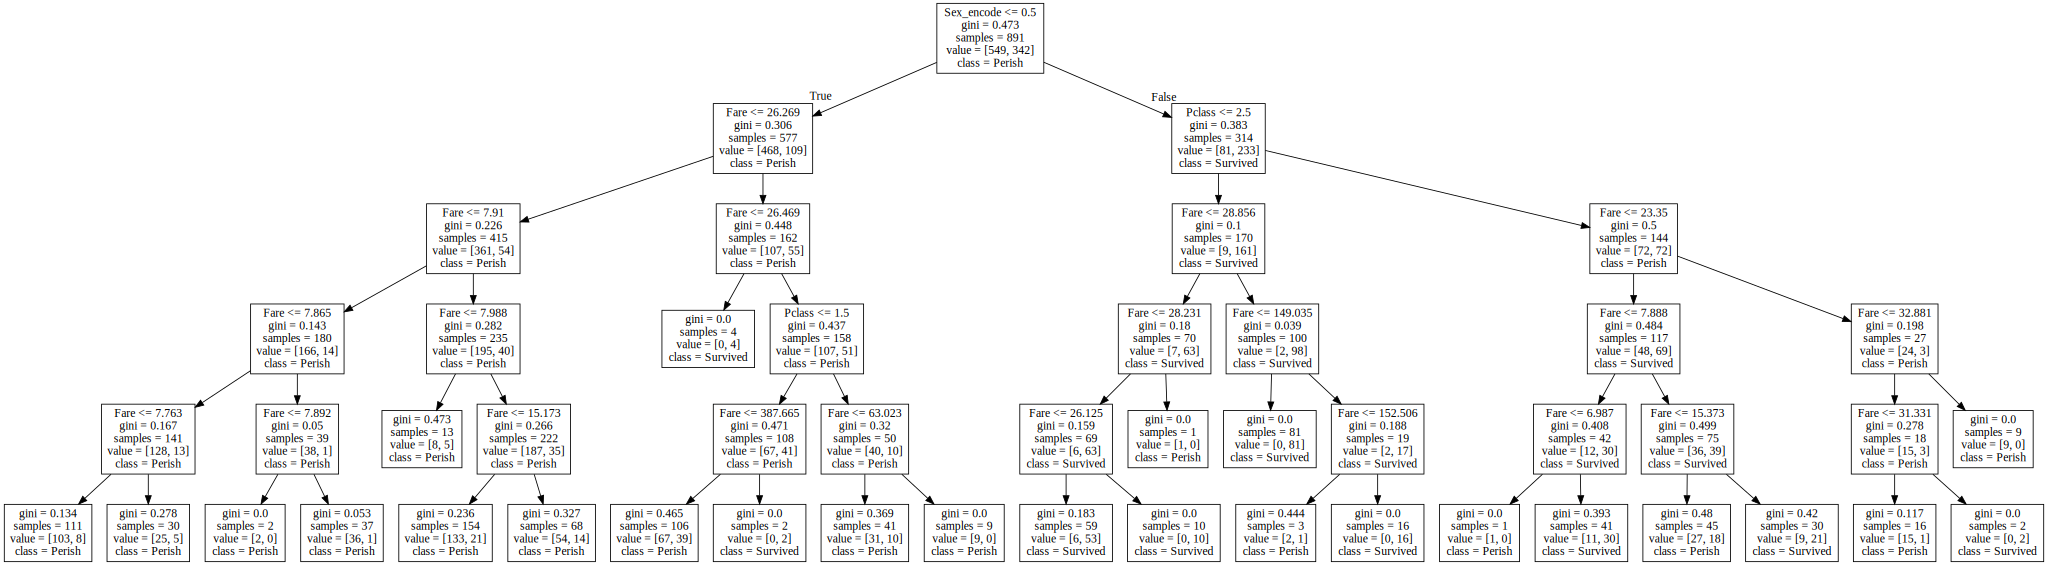

In [55]:
import graphviz
from sklearn.tree import export_graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:\\Users\\user\\Anaconda3\\Library\\bin\\graphviz'

tree = export_graphviz(model,
                       feature_names = feature_names,
                       class_names = ["Perish", "Survived"])

graphviz.Source(tree)

In [56]:
X_test = test[feature_names]
X_test.head()

,Pclass,Sex_encode,Fare
0,3,0,7.8292
1,3,1,7.0000
2,2,0,9.6875
3,3,0,8.6625
4,3,1,12.2875


In [57]:
prediction_list = model.predict(X_test)
prediction_list[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [58]:
# 제출 샘플
submit = pd.read_csv('data/gender_submission.csv')
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [59]:
# 우리의 예측결과를 집어넣음
submit['Survived'] = prediction_list

submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [60]:
submit.to_csv('decision-tree.csv', index = False)

# Decision Tree를 배우는 이유

* 결과가 잘나옴
* 모든 분야에서 쓰일 수 있는 범용적인 방법임. 도메인 지식이 부족해도 가능
* 데이터로 예측할 수 있는 한계가 있음. 이 타이타닉은 84%정도가 한계

In [61]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))